In [7]:
import h5py
import numpy as np
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

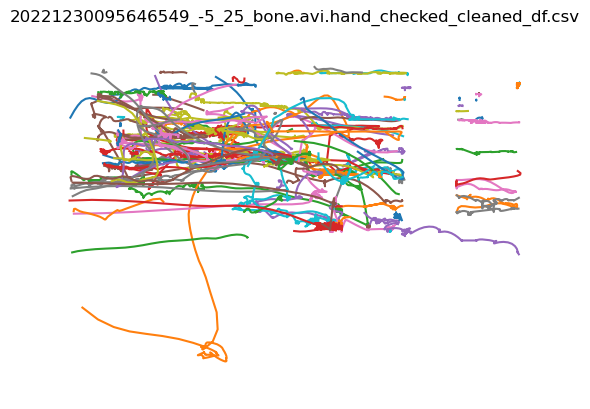

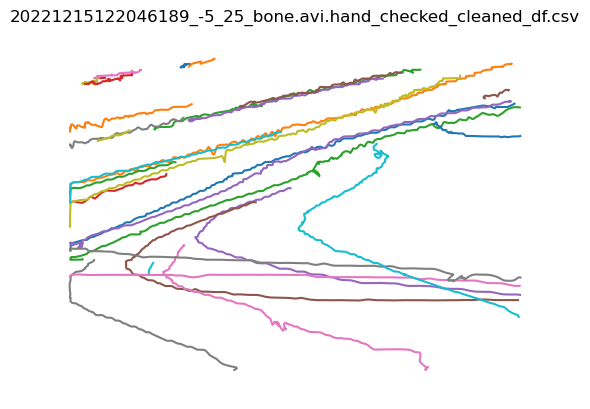

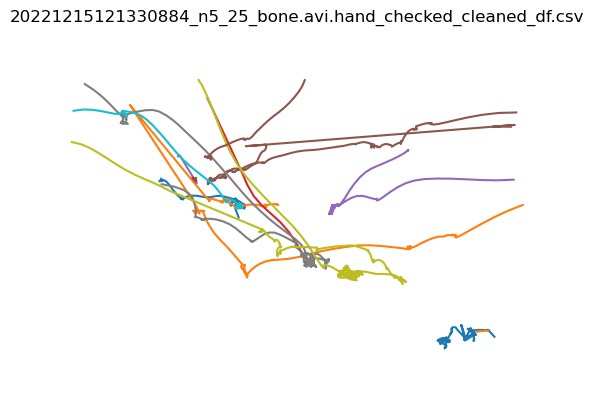

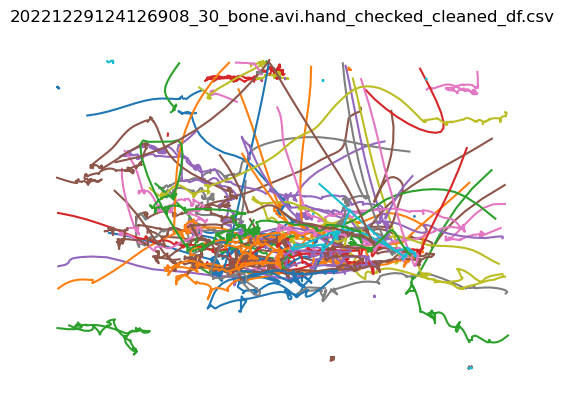

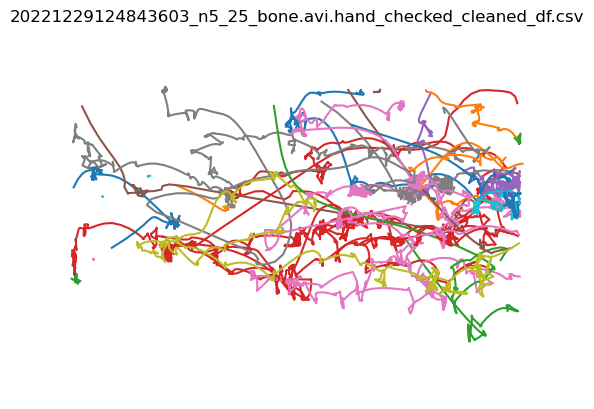

In [36]:
# Load data and plot trajectories
folder_from_colab = '../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/'
csv_files = [f for f in os.listdir(folder_from_colab) if f.endswith('df.csv')]
df_list = []
for file in csv_files:
    filename = os.path.join(folder_from_colab, file)
    df = pd.read_csv(filename)
    # plot the trajectories
    unique_birds = df['bird'].unique()
    # new figure
    plt.figure()
    

    for bird in unique_birds:
        df_bird = df[df['bird'] == bird]
        plt.plot(df_bird['x'], df_bird['y'])
    plt.axis('equal')
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title(file)


MovieWriter stderr:
[rawvideo @ 0x11ce35080] Invalid buffer size, packet size 655360 < expected frame_size 23040000
Error while decoding stream #0:0: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2400x2400', '-pix_fmt', 'rgba', '-r', '60', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', '../data/central_park_birds_2022/visualizations/20221229124843603_n5_25_bone.avi.hand_checked_cleaned.h5_trajectories.mp4']' returned non-zero exit status 255.

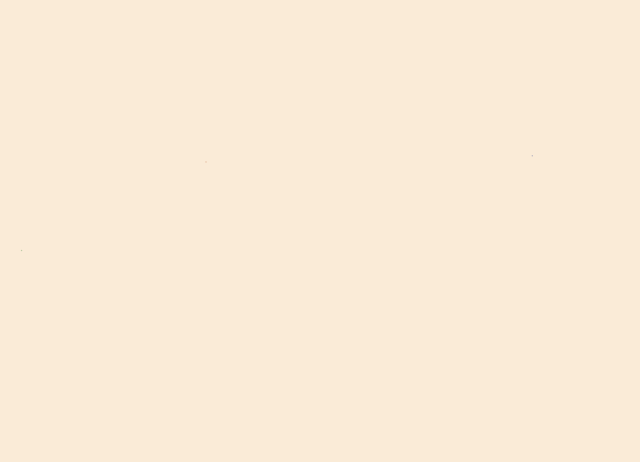

In [30]:
# load each of the analysis files, make a video
# TAKES A WHILE (10-15 minutes) TO RUN, FINE TO SKIP
import real_data_plotting
from importlib import reload
reload(real_data_plotting)

folder_from_colab = '../data/central_park_birds_2022/SLEAP_tracking_outputs/'
h5_files = [f for f in os.listdir(folder_from_colab) if f.endswith('hand_checked_cleaned.h5')] # or f.endswith('cleaned.h5')]
save_dir_mp4 = '../data/central_park_birds_2022/visualizations/'
save_dir_csv = '../data/central_park_birds_2022/SLEAP_tracking_outputs/use_me/'

# iterate over .h5 files in folder
for file in h5_files:
    filename = os.path.join(folder_from_colab, file)
    with h5py.File(filename, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]
        
    # Put data into dataframe format
    data_list = []

    # Iterate over the locations array
    for t in range(locations.shape[0]):
        for bird in range(locations.shape[3]):
            x = locations[t, 0, 0, bird]
            y = locations[t, 0, 1, bird]
            # Check if x and y are not NaN before appending
            if not (np.isnan(x) or np.isnan(y)):
                data_list.append({'x': x, 'y': y, 'time': t, 'bird': bird})


    # Convert to pandas DataFrame
    df = pd.DataFrame(data_list)

    
    # save to csv
    save_path_csv = os.path.join(save_dir_csv,os.path.splitext(os.path.split(filename)[1])[0] +'_df.csv')
    df.to_csv(save_path_csv)

    save_path_video = os.path.join(save_dir_mp4,os.path.split(filename)[1] +'_trajectories.mp4')
    real_data_plotting.generate_bird_trajectories_video(df, save_path_video, fps=60, frames=None, max_history=200)
    print(filename)
